# 7주

### * 군집
- 대표적인 비지도 학습
- 유사한 속성들을 갖는 데이터들을 묶어 전체 데이터셋을 몇 개의 클러스터라는 군집(그룹)으로 나누는 작업이다.
- 한 클러스터 내 데이터 포인트들의 유사성 또는 서로 다른 군집이 속한 개체 간의 상이성 또는 이질성을 최대화하는 방법
- 분류와 비슷하게 군집은 각 데이터 포인트가 어느 클러스터에 속하는지 할당 또는 예측한다.

#### * k-평균 군집
- 하드 클러스터링
- 가장 간단하고 널리 사용되는 대표적인 클러스터링 방법
- 군집의 갯수(k)를 미리 지정한다
- 데이터를 상호 배타적인 k개의 집단으로 묶는 알고리즘
- 어떤 영역을 대표하는 클러스터의 중심을 찾아 각 데이터와 중심 간의 거리를 계산하고 거리가 최소가 되는 군집에 대상 데이터를 배정
- 비교적 많은 양의 데이터에도 적용 가능하다
- 활용 분야 : 시장 분석, 컴퓨터 비전 등

#### 장점
- 사전정보 없이 주어진 데이터의 내부 구조에 대한 의미있는 자료구조를 찾아낼 수 있는 방법
- 다양한 형태의 데이터에 적용 가능 : 분석을 위해 기본적으로 데이터들간의 거리를 데이터 형태에 맞게 변환하면 거의 모든 형태의 데이터에 대하여 적용이 가능한 방법
- 분석방법의 적용이 용이 : 사전정보가 필요하지 않고 관찰치들 사이의 거리만이 분석에 필요한 자료

#### 단점
- 어려운 가중치와 거리 정의 : 관찰치들 사이의 거리를 정의하고 각 변수에 대한 가중치를 결정하는 것이 매우 어려운 문제
- 초기 군집의 갯수(k)를 미리 지정 : 미리 지정된 군집의 갯수를 기준으로 동일한 수의 군집을 찾게 되므로 만일 군집의 갯수가 적협하지 않다면 결과 만족도가 낮다
- 사전에 주어진 목적이 없으므로 결과를 해석하는데 있어서 어렵다

#### [ k-평균 군집 실습 ]

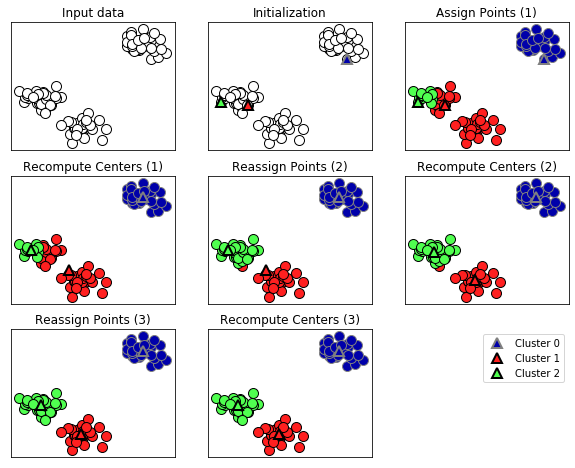

In [1]:
import mglearn

mglearn.plots.plot_kmeans_algorithm()

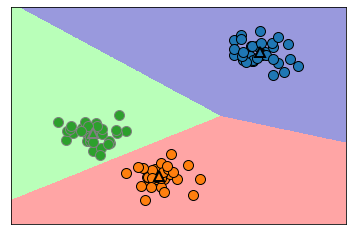

In [2]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print("클러스터 레이블 : \n{}".format(kmeans.labels_))

클러스터 레이블 : 
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [5]:
print("클러스터 레이블 : \n{}".format(kmeans.predict(X)))

클러스터 레이블 : 
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


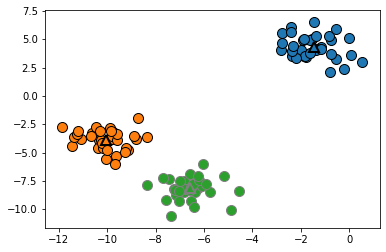

In [7]:
X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

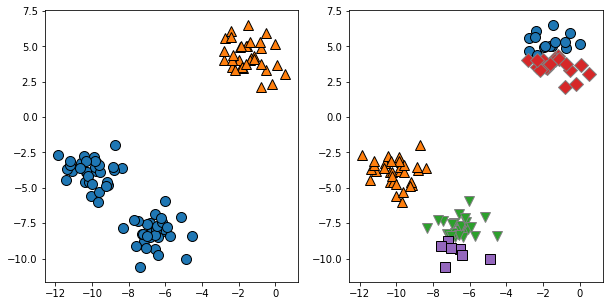

In [13]:
import matplotlib.pyplot as plt

X, y = make_blobs(random_state=1)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

plt.show()

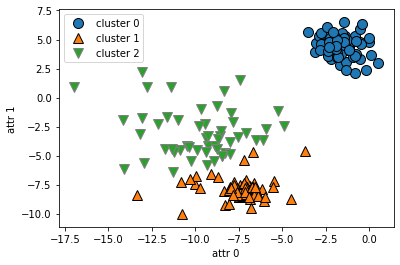

In [14]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=1)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)

plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("attr 0")
plt.ylabel("attr 1")
plt.show()

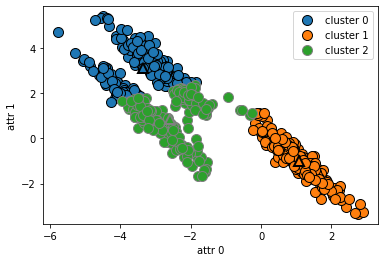

In [17]:
import numpy as np


X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)


transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0,1,2], markers='^', markeredgewidth=2)

plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("attr 0")
plt.ylabel("attr 1")
plt.show()

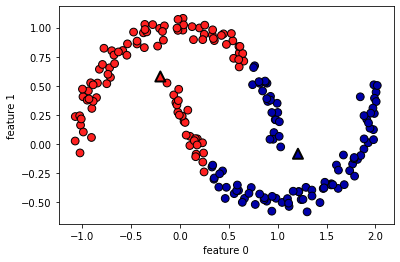

In [19]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)],
           s=100, linewidth=2, edgecolors='k')
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

In [33]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

In [37]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0, max_iter=3000)

In [47]:
nmf.fit(X_train)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=3000,
    n_components=100, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [49]:
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
X_reconstructed_kmeans = kmeans.cluster_centers_[[kmeans.predict(X_test)]]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


Text(0, 0.5, 'nmf')

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52628 missing from current

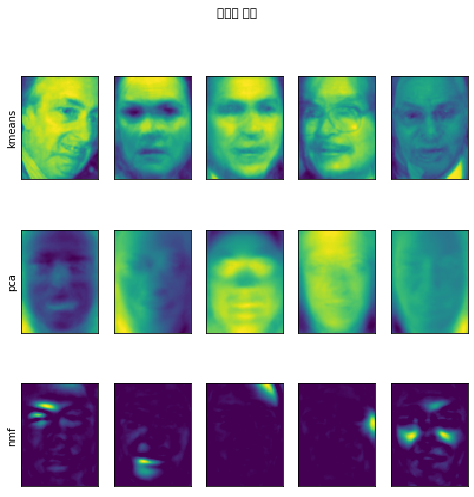

In [50]:
fig, axes = plt.subplots(3, 5, figsize=(8,8),
                         subplot_kw={'xticks':(), 'yticks':()})
fig.suptitle("추출한 성분")


for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

Text(0, 0.5, 'nmf')

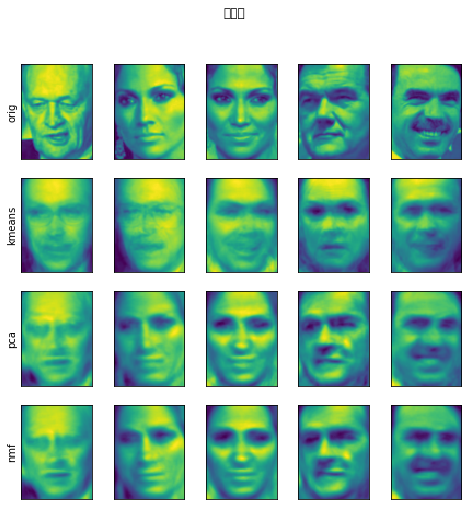

In [52]:
fig, axes = plt.subplots(4, 5, figsize=(8,8), subplot_kw={'xticks':(), 'yticks':()})
fig.suptitle("재구성")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape), cmap='viridis')
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("orig")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

# k-평균을 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것 : 벡터 양자화

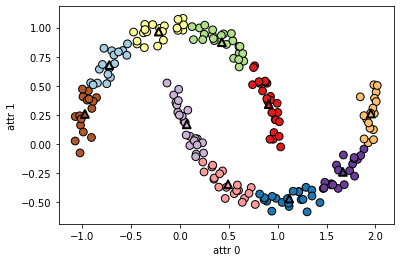

클러스터 레이블 : 
[4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


In [59]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)

y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', 
            c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolor='black')
plt.xlabel("attr 0")
plt.ylabel("attr 1")
plt.show()

print("클러스터 레이블 : \n{}".format(y_pred))